In [1]:
! pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import tensorflow as tf

In [5]:
tf.__version__

'2.8.2'

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import itertools
%matplotlib inline


In [7]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [9]:
TW_data = pd.read_csv("/content/drive/MyDrive/Credit Card Defaulters/creditcarddefault.csv")

In [10]:
TW_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
TW_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
TW_data.shape

(30000, 25)

In [13]:
TW_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [14]:
#removing the customer id and name and saving the dependent variable in x
x = TW_data.iloc[:,1:24].values

#saving the independent values in y
y = TW_data.iloc[:,24].values

print(x)
print(y)

[[ 20000      2      2 ...      0      0      0]
 [120000      2      2 ...   1000      0   2000]
 [ 90000      2      2 ...   1000   1000   5000]
 ...
 [ 30000      1      2 ...   4200   2000   3100]
 [ 80000      1      3 ...   1926  52964   1804]
 [ 50000      1      2 ...   1000   1000   1000]]
[1 1 0 ... 1 1 1]


In [15]:
x.shape

(30000, 23)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=111)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21000, 23)
(9000, 23)
(21000,)
(9000,)


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
x_train[:1]

array([[ 0.48238852,  0.81447304,  0.18907673,  0.86211952, -0.48921975,
        -0.87463676, -0.72347864, -0.6983838 , -0.66637051,  0.23416564,
         0.25233359, -0.63042993, -0.63367788, -0.6645842 , -0.51248219,
        -0.57038965,  0.39521137, -0.0821721 , -0.22758026,  0.33473587,
        -0.28260403,  3.38918769, -0.15149706]])

**Model Building using Keras**

In [19]:
from keras.models import Sequential
from keras.layers import Dense

In [20]:
class_model_keras = Sequential()

In [21]:
# 1st HIDDEN layer
class_model_keras.add(Dense(24,input_dim =23, activation ='relu'))

#2nd  Hidden layer
# As the imput dim to this layer is the output from the previous layer
#we need not explicitly specify it here
class_model_keras.add(Dense(12, activation = 'relu'))

#Output layer
#sigmoid activation is used to get the output between 0 and 1
class_model_keras.add(Dense(1,activation = 'sigmoid'))

In [22]:
class_model_keras.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                576       
                                                                 
 dense_1 (Dense)             (None, 12)                300       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 889
Trainable params: 889
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compiling the neural network
class_model_keras.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [24]:
#Fitting the model
class_model_keras.fit(x_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
2100/2100 [==============================] - 3s 1ms/step - loss: 0.4703 - accuracy: 0.8066
Epoch 2/100
2100/2100 [==============================] - 2s 1ms/step - loss: 0.4441 - accuracy: 0.8164
Epoch 3/100
2100/2100 [==============================] - 2s 1ms/step - loss: 0.4378 - accuracy: 0.8189
Epoch 4/100
2100/2100 [==============================] - 2s 1ms/step - loss: 0.4339 - accuracy: 0.8204
Epoch 5/100
2100/2100 [==============================] - 2s 985us/step - loss: 0.4321 - accuracy: 0.8201
Epoch 6/100
2100/2100 [==============================] - 2s 1ms/step - loss: 0.4293 - accuracy: 0.8203
Epoch 7/100
2100/2100 [==============================] - 2s 985us/step - loss: 0.4283 - accuracy: 0.8211
Epoch 8/100
2100/2100 [==============================] - 2s 1ms/step - loss: 0.4270 - accuracy: 0.8201
Epoch 9/100
2100/2100 [==============================] - 2s 996us/step - loss: 0.4258 - accuracy: 0.8213
Epoch 10/100
2100/2100 [==============================] - 2s 997us/

In [27]:
#Predicting the results
y_pred = class_model_keras.predict(x_test)

In [28]:
pred = (y_pred>0.5)

In [29]:
pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [30]:
y_pred[pred]

array([0.8860235, 0.7626087, 0.6062794, ..., 0.620694 , 0.7071314,
       0.6739755], dtype=float32)

In [39]:
target_names = ['no','yes']

#https://scikit-learn.org/0.18/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




  



Confusion matrix, without normalization
[[6615  365]
 [1311  709]]


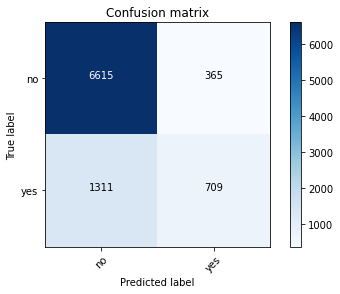

In [40]:
#Formulating the confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred)

plt.figure()
plot_confusion_matrix(cm, classes=target_names, normalize=False)
plt.show()


In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[6615,  365],
       [1311,  709]])

In [43]:
#Evaluate the model

scores = class_model_keras.evaluate(x_test,y_test)
print(scores)

282/282 [==============================] - 0s 890us/step - loss: 0.4553 - accuracy: 0.8138
[0.45525434613227844, 0.8137778043746948]


In [44]:
print("\nACCURACY: %.2f%%" %(scores[1]*100))


ACCURACY: 81.38%
